In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('placement.csv')

In [4]:
df.shape

(1000, 3)

In [5]:
df.sample(5)

,cgpa,placement_exam_marks,placed
462,6.71,9.0,1
896,5.73,38.0,0
208,7.25,12.0,1
664,7.23,34.0,0
756,7.41,30.0,1


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


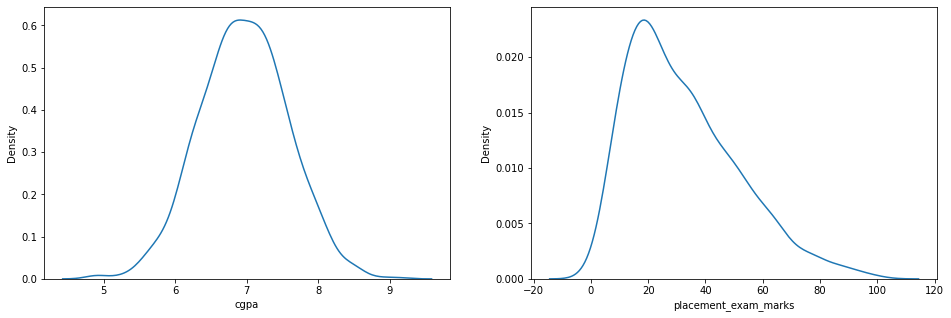

In [9]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.distplot(df['cgpa'],hist=False)

plt.subplot(122)
sns.distplot(df['placement_exam_marks'],hist=False)

plt.show()

In [11]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Max value of cgpa",df['cgpa'].max())
print("Min value of cgpa",df['cgpa'].min())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323894
Max value of cgpa 9.12
Min value of cgpa 4.89


In [12]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [13]:
df['cgpa'].skew()

-0.014529938929314918

In [14]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

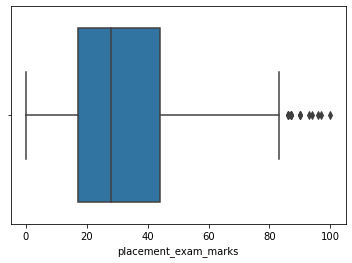

In [15]:
sns.boxplot(df['placement_exam_marks'])

In [16]:
per25 = df['placement_exam_marks'].quantile(0.25)
per75 = df['placement_exam_marks'].quantile(0.75)

In [17]:
per25

17.0

In [18]:
per75

44.0

In [19]:
iqr = per75-per25

In [20]:
iqr

27.0

In [21]:
upper_limit = per75 + 1.5*iqr
lower_limit = per25 - 1.5*iqr

In [22]:
print("Upper Limit ", upper_limit)
print("Lower Limit ", lower_limit)

Upper Limit  84.5
Lower Limit  -23.5


# Finding Outliers

In [27]:
df[df['placement_exam_marks']>upper_limit].shape

(15, 3)

In [24]:
df[df['placement_exam_marks']<lower_limit]

,cgpa,placement_exam_marks,placed


# Trimming

In [25]:
new_df = df[df['placement_exam_marks']<upper_limit]

In [29]:
new_df.shape

(985, 3)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density pl

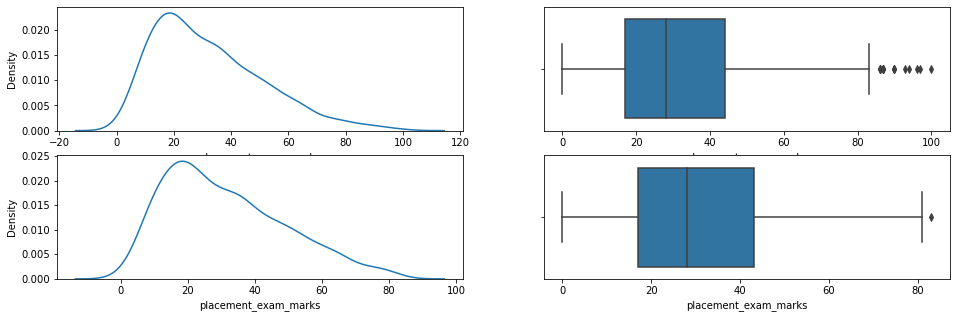

In [31]:
plt.figure(figsize=(16,5))
plt.subplot(221)
sns.distplot(df['placement_exam_marks'],hist=False)

plt.subplot(222)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(223)
sns.distplot(new_df['placement_exam_marks'],hist=False)

plt.subplot(224)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

# Capping

In [32]:
new_df_cap = df.copy()

In [33]:
new_df_cap['placement_exam_marks'] = np.where(
new_df_cap['placement_exam_marks']>upper_limit,
upper_limit,
np.where(
new_df_cap['placement_exam_marks']<lower_limit,
lower_limit,new_df_cap['placement_exam_marks']
))

In [34]:
new_df_cap.shape

(1000, 3)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density pl

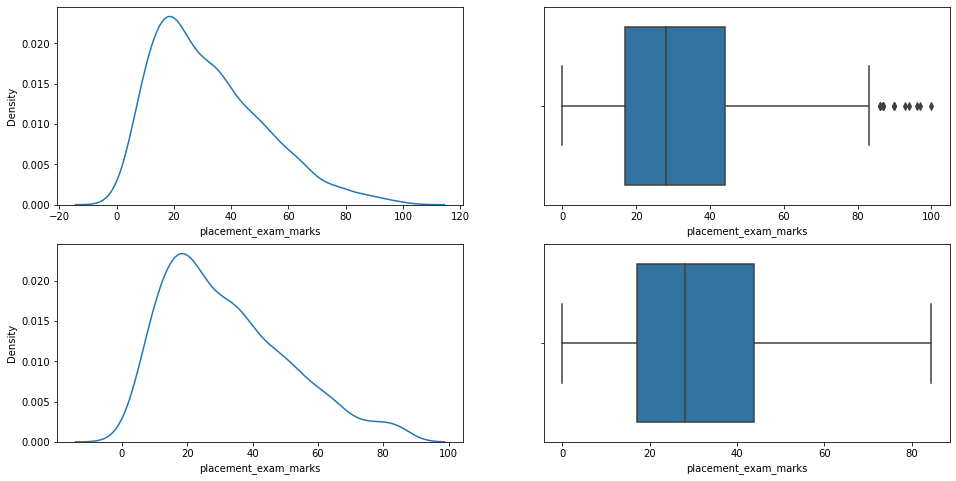

In [35]:
plt.figure(figsize=(16,8))
plt.subplot(221)
sns.distplot(df['placement_exam_marks'],hist=False)

plt.subplot(222)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(223)
sns.distplot(new_df_cap['placement_exam_marks'],hist=False)

plt.subplot(224)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()